# Rainfall Weather Forecasting

## Problem Statement:

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia.

# Importing Packages

In [70]:
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Loading Data

In [71]:
df = pd.read_csv('Rainfall Prediction - Weather Forecasting.csv')

# Exploring and Visualizing Data 

In [72]:
# Shape of the data frame
df.shape

(8425, 23)

The data frame has 23 Attributes with 8425 data points

In [73]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [75]:
 #Describe Method says the statistics of our data like Maxvalue,Mean,Count..etc for every column
 
df.describe()     

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [76]:
# Count of Null values across each Column
df.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

It is clear that Evaporation and Sunshine have very high percentage of missing values.

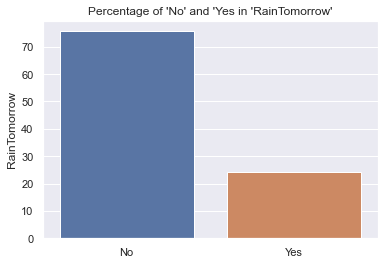

In [77]:
#Counting the Count of 'NO' and 'YES' from the column RainTomorrow 
RT = df["RainTomorrow"].value_counts(normalize = True)

sns.barplot(x = RT.index, y = RT*100).set_title("Percentage of 'No' and 'Yes in 'RainTomorrow'");

We can see the Class Imbalance from the above plot. It is better to resample the data for better accuracy

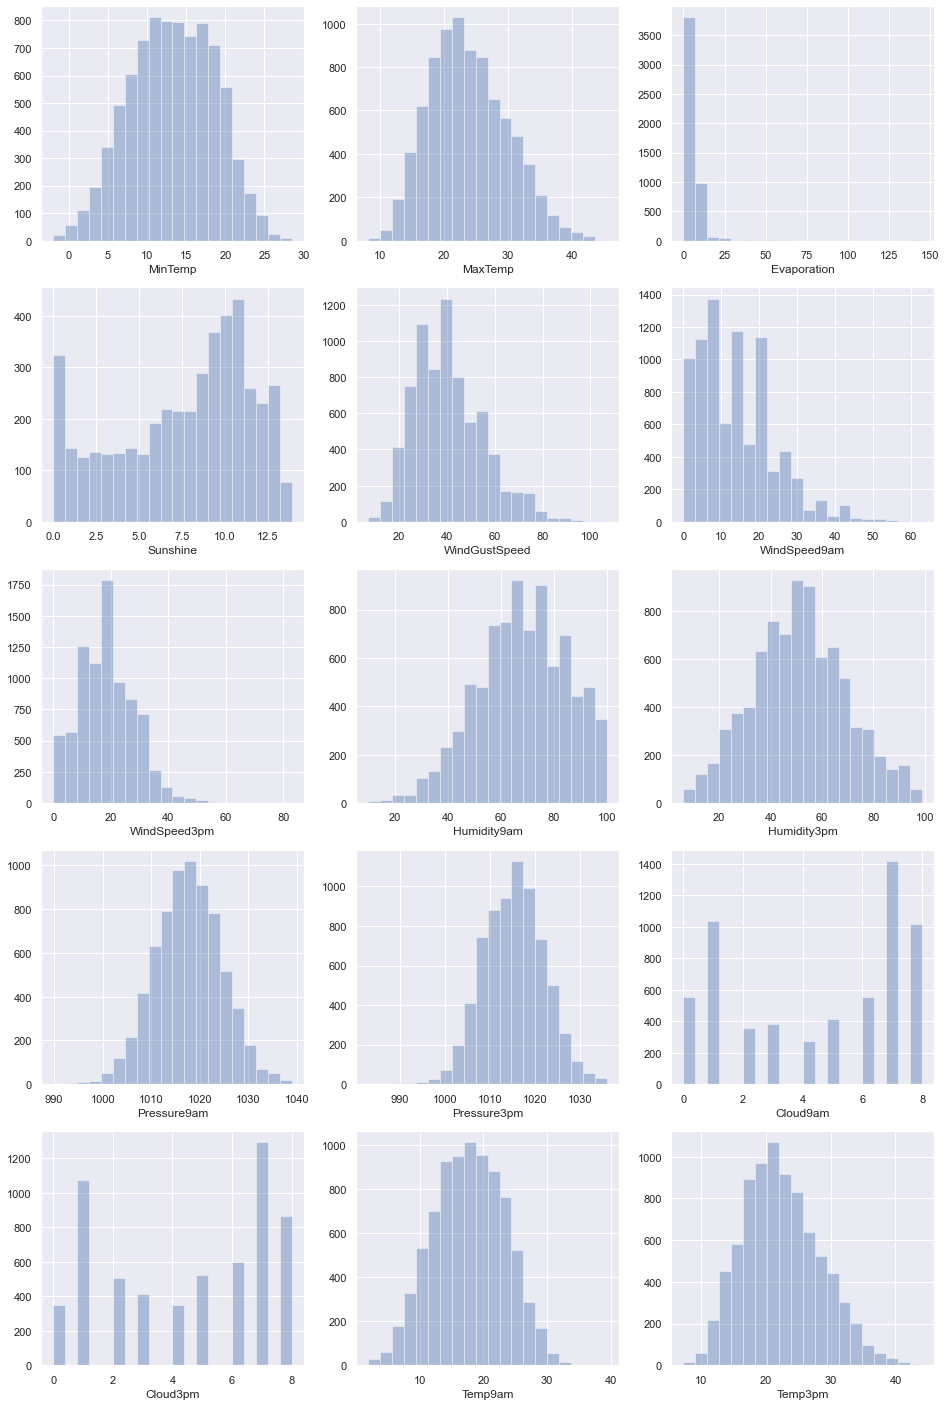

In [78]:
n_rows=5
n_cols=3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols);
fig.set_size_inches((16, 25))

#Considering the columns which are useful for evaluation 
dt = df.iloc[:, [2, 3, 5, 6, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]

for i, column in enumerate(dt.columns):
    sns.distplot(df[column],ax=axes[i//n_cols,i%n_cols], kde = False, bins = 20);

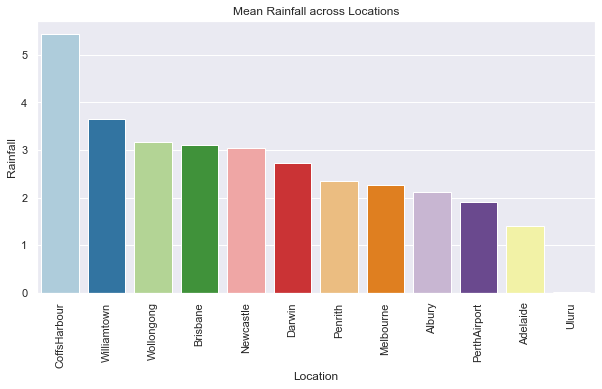

In [79]:
RF_loc = df.groupby('Location')["Rainfall"].mean().sort_values(ascending = False)

fig = plt.gcf()
fig.set_size_inches((10, 5))
plt.xticks(rotation = 90)
sns.barplot(x = RF_loc.index, y = RF_loc,
            palette = sns.color_palette("Paired")).\
            set_title("Mean Rainfall across Locations");

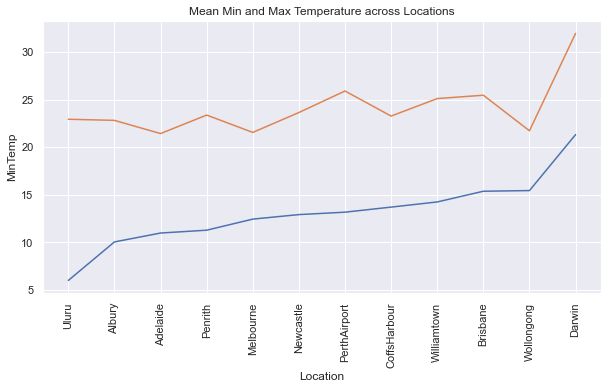

In [80]:
MinTemp_loc = df.groupby('Location')["MinTemp"].mean().sort_values()
MaxTemp_loc = df.groupby('Location')["MaxTemp"].mean().sort_values()

fig = plt.gcf()
fig.set_size_inches((10, 5))
plt.xticks(rotation = 90)
sns.lineplot(x = MinTemp_loc.index, y = MinTemp_loc);
sns.lineplot(x = MaxTemp_loc.index, y = MaxTemp_loc).\
            set_title("Mean Min and Max Temperature across Locations");

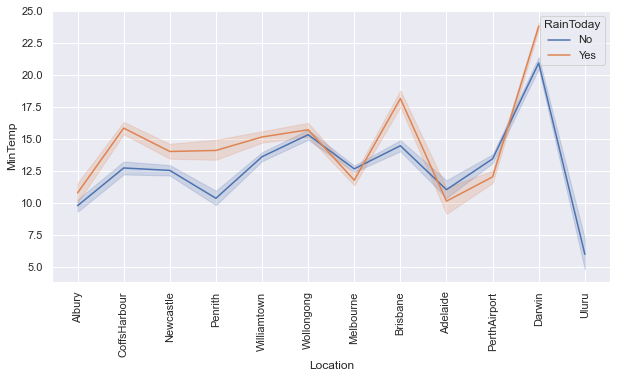

In [81]:
fig = plt.gcf()
fig.set_size_inches((10, 5))
plt.xticks(rotation = 90)

sns.lineplot(df.Location, df.MinTemp, hue = df.RainToday);

### Lineplot Comparision between MinTemp and Location

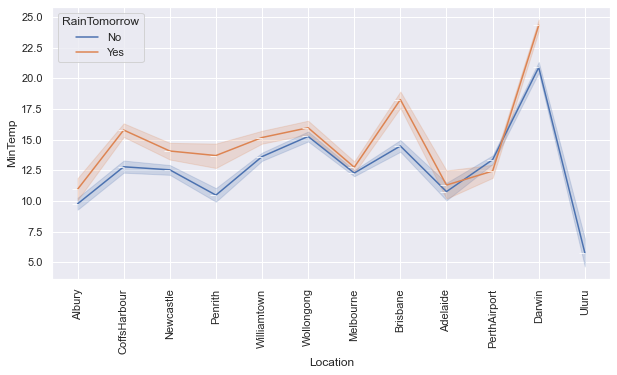

In [82]:
fig = plt.gcf()
fig.set_size_inches((10, 5))
plt.xticks(rotation = 90)

sns.lineplot(df.Location, df.MinTemp, hue = df.RainTomorrow, marker = False);

### Lineplot Comparision between Location and Humidity3pm

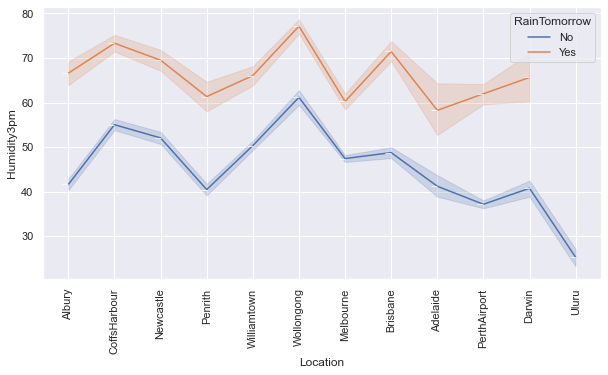

In [83]:
fig = plt.gcf()
fig.set_size_inches((10, 5))
plt.xticks(rotation = 90)

sns.lineplot(df.Location, df.Humidity3pm, hue = df.RainTomorrow, marker = False);

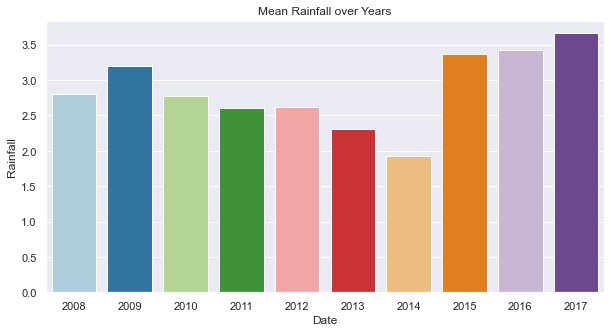

In [84]:
df['Date'] = pd.to_datetime(df['Date'])
RF_year = df.groupby(df['Date'].dt.year)['Rainfall'].mean()

fig = plt.gcf()
fig.set_size_inches((10, 5))

sns.barplot(x = RF_year.index, y = RF_year, 
            palette = sns.color_palette("Paired")).\
            set_title("Mean Rainfall over Years");

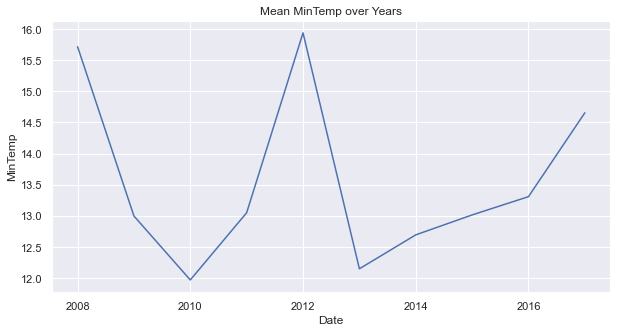

In [85]:
df['Date'] = pd.to_datetime(df['Date'])
MinTemp_year = df.groupby(df['Date'].dt.year)['MinTemp'].mean()

fig = plt.gcf()
fig.set_size_inches((10, 5))

sns.lineplot(x = MinTemp_year.index, y = MinTemp_year,  
            palette = sns.color_palette("Paired")).\
            set_title("Mean MinTemp over Years");

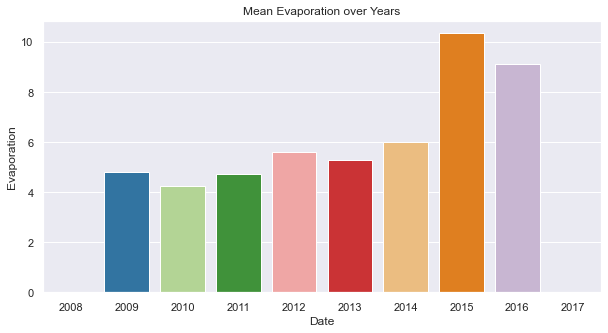

In [86]:
df['Date'] = pd.to_datetime(df['Date'])
Ev_year = df.groupby(df['Date'].dt.year)['Evaporation'].mean()

fig = plt.gcf()
fig.set_size_inches((10, 5))

sns.barplot(x = Ev_year.index, y = Ev_year,
            palette = sns.color_palette("Paired")).\
            set_title("Mean Evaporation over Years");

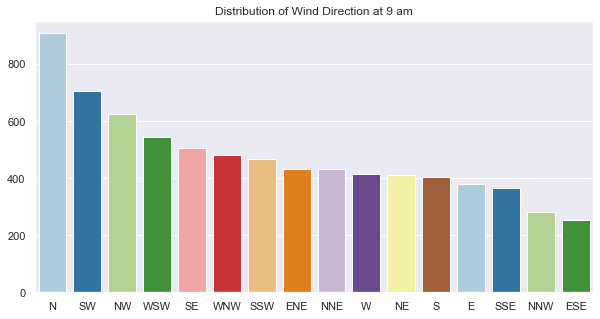

In [87]:
fig = plt.gcf()
fig.set_size_inches((10, 5));

sns.barplot(x = df['WindDir9am'].value_counts().index,
            y = df['WindDir9am'].value_counts().values,
            palette = sns.color_palette("Paired")).\
            set_title("Distribution of Wind Direction at 9 am");

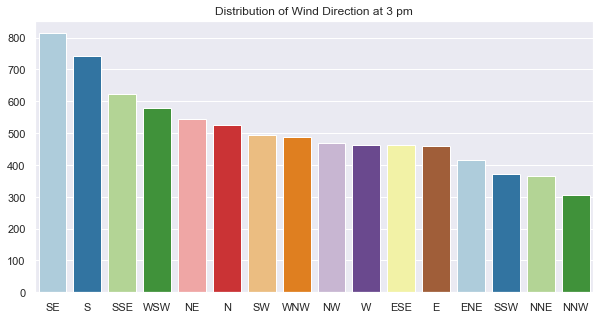

In [88]:
fig = plt.gcf()
fig.set_size_inches((10, 5));

sns.barplot(x = df['WindDir3pm'].value_counts().index,
            y = df['WindDir3pm'].value_counts().values,
            palette = sns.color_palette("Paired")).\
            set_title("Distribution of Wind Direction at 3 pm");

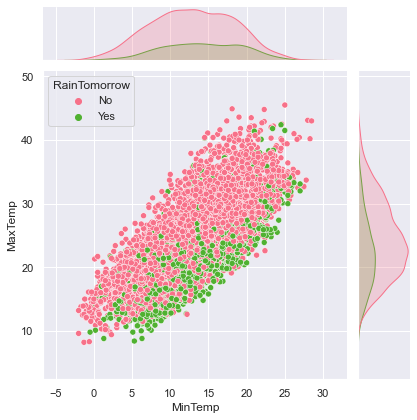

In [89]:
sns.jointplot(x = 'MinTemp', y = 'MaxTemp', hue = 'RainTomorrow', 
                data = df, palette = [sns.color_palette("husl", 9)[0], 
                                      sns.color_palette("husl", 9)[3]]);

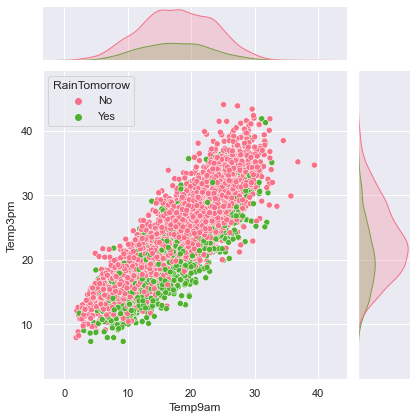

In [90]:
sns.jointplot(x = 'Temp9am', y = 'Temp3pm', hue = 'RainTomorrow', 
                data = df, palette = [sns.color_palette("husl", 9)[0], 
                                      sns.color_palette("husl", 9)[3]]);

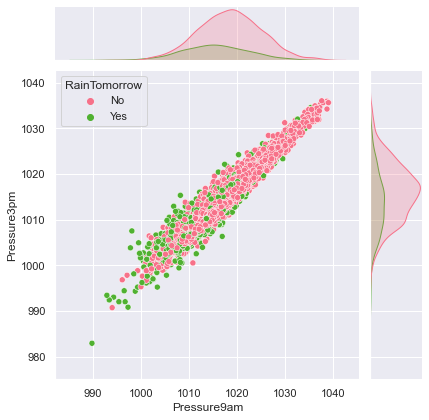

In [91]:
sns.jointplot(x = 'Pressure9am', y = 'Pressure3pm', hue = 'RainTomorrow', 
                data = df, palette = [sns.color_palette("husl", 9)[0], 
                                      sns.color_palette("husl", 9)[3]]);

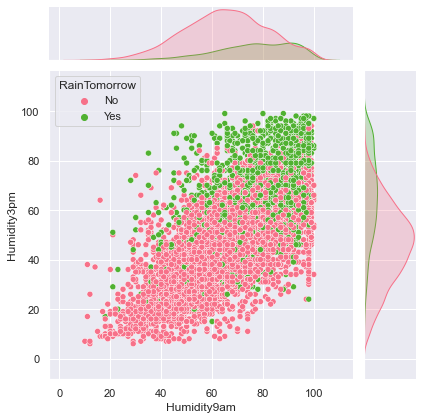

In [92]:
sns.jointplot(x = 'Humidity9am', y = 'Humidity3pm', hue = 'RainTomorrow', 
                data = df, palette = [sns.color_palette("husl", 9)[0], 
                                      sns.color_palette("husl", 9)[3]]);

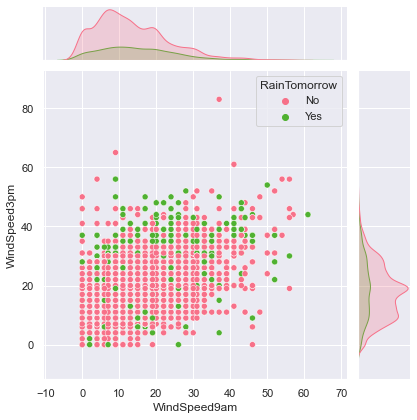

In [93]:
sns.jointplot(x = 'WindSpeed9am', y = 'WindSpeed3pm', hue = 'RainTomorrow', 
                data = df, palette = [sns.color_palette("husl", 9)[0], 
                                      sns.color_palette("husl", 9)[3]]);

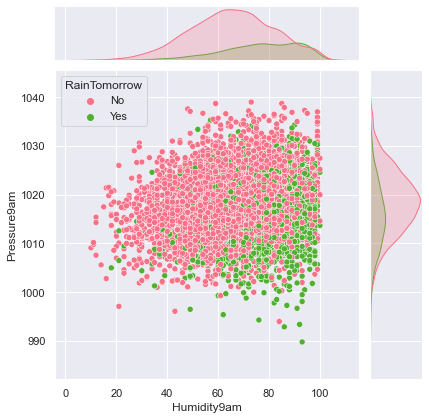

In [94]:
sns.jointplot(x = 'Humidity9am', y = 'Pressure9am', hue = 'RainTomorrow', 
                data = df, palette = [sns.color_palette("husl", 9)[0], 
                                      sns.color_palette("husl", 9)[3]]);

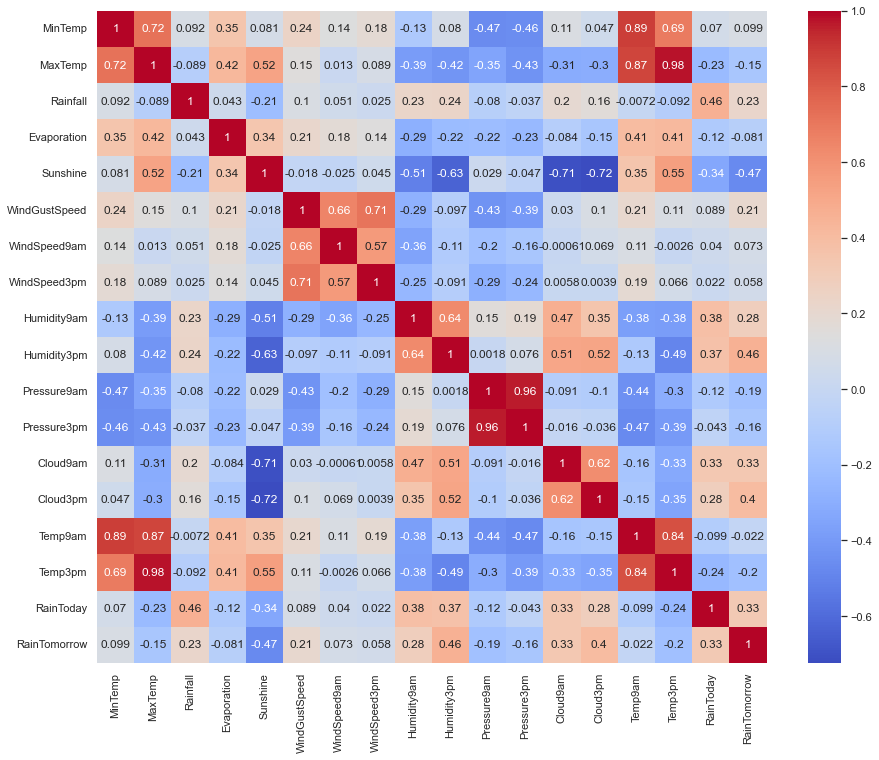

In [95]:
fig = plt.gcf()
fig.set_size_inches((15, 12));

df['RainToday'].replace({'No': 0, 'Yes': 1}, inplace  = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)

sns.heatmap(df.corr(), annot = True, cmap = sns.color_palette("coolwarm", as_cmap = True));

In [ ]:
rain = df

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.naive_bayes import BernoulliNB
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:>

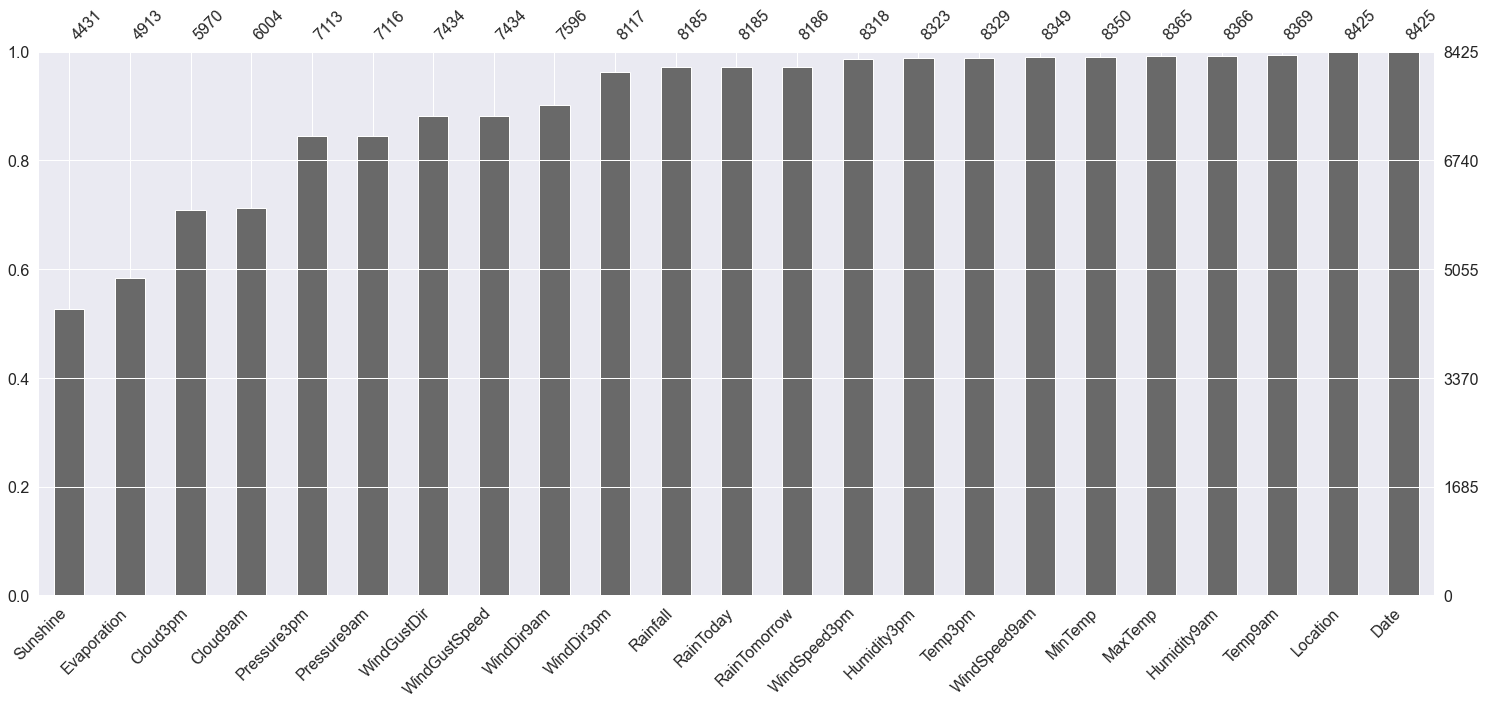

In [28]:
import missingno as msno
msno.bar(rain, sort='ascending')

In [29]:
#Checking percentage of missing data in every column

(rain.isnull().sum()/len(rain))*100

Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation      41.685460
Sunshine         47.406528
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am         28.735905
Cloud3pm         29.139466
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

In [30]:
#Filling the missing values for continuous variables with mean
rain['MinTemp']=rain['MinTemp'].fillna(rain['MinTemp'].mean())
rain['MaxTemp']=rain['MaxTemp'].fillna(rain['MaxTemp'].mean())
rain['Rainfall']=rain['Rainfall'].fillna(rain['Rainfall'].mean())
rain['Evaporation']=rain['Evaporation'].fillna(rain['Evaporation'].mean())
rain['Sunshine']=rain['Sunshine'].fillna(rain['Sunshine'].mean())
rain['WindGustSpeed']=rain['WindGustSpeed'].fillna(rain['WindGustSpeed'].mean())
rain['WindSpeed9am']=rain['WindSpeed9am'].fillna(rain['WindSpeed9am'].mean())
rain['WindSpeed3pm']=rain['WindSpeed3pm'].fillna(rain['WindSpeed3pm'].mean())
rain['Humidity9am']=rain['Humidity9am'].fillna(rain['Humidity9am'].mean())
rain['Humidity3pm']=rain['Humidity3pm'].fillna(rain['Humidity3pm'].mean())
rain['Pressure9am']=rain['Pressure9am'].fillna(rain['Pressure9am'].mean())
rain['Pressure3pm']=rain['Pressure3pm'].fillna(rain['Pressure3pm'].mean())
rain['Cloud9am']=rain['Cloud9am'].fillna(rain['Cloud9am'].mean())
rain['Cloud3pm']=rain['Cloud3pm'].fillna(rain['Cloud3pm'].mean())
rain['Temp9am']=rain['Temp9am'].fillna(rain['Temp9am'].mean())
rain['Temp3pm']=rain['Temp3pm'].fillna(rain['Temp3pm'].mean())

In [31]:
#Filling the missing values for continuous variables with mode

rain['RainToday']=rain['RainToday'].fillna(rain['RainToday'].mode()[0])
rain['RainTomorrow']=rain['RainTomorrow'].fillna(rain['RainTomorrow'].mode()[0])

In [32]:
#Filling the missing values for continuous variables with mode
rain['WindDir9am'] = rain['WindDir9am'].fillna(rain['WindDir9am'].mode()[0])
rain['Rainfall'] = rain['Rainfall'].fillna(rain['Rainfall'].mode()[0])
rain['WindGustDir'] = rain['WindGustDir'].fillna(rain['WindGustDir'].mode()[0])
rain['WindDir3pm'] = rain['WindDir3pm'].fillna(rain['WindDir3pm'].mode()[0])

In [33]:
# parse the dates, currently coded as strings, into datetime format
rain['Date'] = pd.to_datetime(rain['Date'])

# extract year from date
rain['Year'] = rain['Date'].dt.year
rain['Year'].head()


# extract month from date
rain['Month'] = rain['Date'].dt.month
rain['Month'].head()


# extract day from date
rain['Day'] = rain['Date'].dt.day
rain['Day'].head()


# drop the original Date variable
rain.drop('Date', axis=1, inplace = True)

In [34]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
rain['Location'] = le.fit_transform(rain['Location'])
rain['WindDir9am'] = le.fit_transform(rain['WindDir9am'])
rain['WindDir3pm'] = le.fit_transform(rain['WindDir3pm'])
rain['WindGustDir'] = le.fit_transform(rain['WindGustDir'])

In [35]:
from scipy import stats
print('Shape of DataFrame Before Removing Outliers', rain.shape )
rain=rain[(np.abs(stats.zscore(rain)) < 3).all(axis=1)]
print('Shape of DataFrame After Removing Outliers', rain.shape )

Shape of DataFrame Before Removing Outliers (8425, 25)
Shape of DataFrame After Removing Outliers (7987, 25)


In [36]:
rain.Rainfall.value_counts()

0.000000     5071
0.200000      390
2.805913      232
0.400000      176
0.600000      115
             ... 
29.400000       1
29.800000       1
24.800000       1
32.800000       1
26.800000       1
Name: Rainfall, Length: 171, dtype: int64

In [37]:
rain['Rainfall']=rain['Rainfall'].astype(float)

In [38]:
rain['Rainfall']=rain['Rainfall'].apply(np.floor)

In [39]:
rain=rain.drop(['Temp3pm','Temp9am','Humidity9am'],axis=1)
rain.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow',
       'Year', 'Month', 'Day'],
      dtype='object')

In [40]:
rain['Rainfall'].unique

<bound method Series.unique of 0       0.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
8420    0.0
8421    0.0
8422    0.0
8423    0.0
8424    0.0
Name: Rainfall, Length: 7987, dtype: float64>

In [41]:
X = rain.drop(["Rainfall"], axis=1)
y = rain["Rainfall"]


In [42]:
y.value_counts

<bound method IndexOpsMixin.value_counts of 0       0.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
8420    0.0
8421    0.0
8422    0.0
8423    0.0
8424    0.0
Name: Rainfall, Length: 7987, dtype: float64>

In [43]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=55)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(5590, 21)
(2397, 21)
(2397,)
(5590,)


In [45]:
logiestic = LogisticRegression(max_iter=200)
logiestic.fit(x_train, y_train)
y_train_pred = logiestic.predict(x_train)
y_pred= logiestic.predict(x_test)
print("Train accuracy: "+str(accuracy_score(y_train, y_train_pred)))
print("Test accuracy: "+str(accuracy_score(y_test, y_pred)))

Train accuracy: 0.7429338103756709
Test accuracy: 0.7142261159783062


In [46]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_train_pred = knn.predict(x_train)
y_pred= knn.predict(x_test)
print("Train accuracy: "+str(accuracy_score(y_train, y_train_pred)))
print("Test accuracy: "+str(accuracy_score(y_test, y_pred)))

Train accuracy: 0.7708407871198569
Test accuracy: 0.6975385899040467


In [47]:
forest = RandomForestClassifier(n_estimators=100, max_depth=8)
forest.fit(x_train, y_train)
y_train_pred = forest.predict(x_train)
y_pred= forest.predict(x_test)
print("Train accuracy: "+str(accuracy_score(y_train, y_train_pred)))
print("Test accuracy: "+str(accuracy_score(y_test, y_pred)))

Train accuracy: 0.8865831842576029
Test accuracy: 0.7763871506049228


In [48]:
nb = BernoulliNB()
nb.fit(x_train, y_train)
y_train_pred = nb.predict(x_train)
y_pred= nb.predict(x_test)
print("Train accuracy: "+str(accuracy_score(y_train, y_train_pred)))
print("Test accuracy: "+str(accuracy_score(y_test, y_pred)))

Train accuracy: 0.7806797853309482
Test accuracy: 0.7501042970379641


# Cleaning and Preprocessing Data

## Handling Class Imbalance

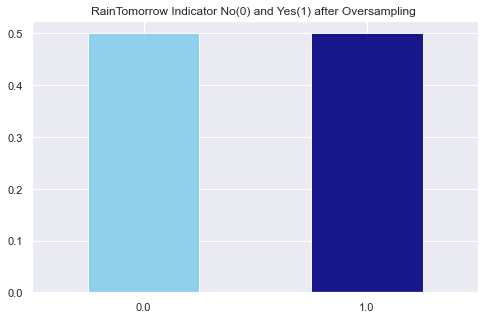

In [96]:
from sklearn.utils import resample

no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
df = pd.concat([no, yes_oversampled])


fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling ')
plt.show()

## Feature Selection

In [97]:
X = df.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
Y = df.iloc[:,-1].values

In [98]:
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 0.0]
 ['Albury' 7.4 25.1 ... 17.2 24.3 0.0]
 ['Albury' 12.9 25.7 ... 21.0 23.2 0.0]
 ...
 ['Melbourne' 8.8 18.1 ... 12.9 18.1 0.0]
 ['Melbourne' 19.6 23.5 ... 19.8 19.9 1.0]
 ['Adelaide' 7.2 13.3 ... 8.5 12.6 1.0]]


In [99]:
print(Y)

[0. 0. 0. ... 1. 1. 1.]


In [100]:
Y=Y.reshape(-1,1)
Y

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

## Dealing with Missing Values

In [101]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan,strategy='most_frequent') # Fill the missing values with Mode
X = imp.fit_transform(X)
Y = imp.fit_transform(Y)

In [102]:
X

array([['Albury', 13.4, 22.9, ..., 16.9, 21.8, 0.0],
       ['Albury', 7.4, 25.1, ..., 17.2, 24.3, 0.0],
       ['Albury', 12.9, 25.7, ..., 21.0, 23.2, 0.0],
       ...,
       ['Melbourne', 8.8, 18.1, ..., 12.9, 18.1, 0.0],
       ['Melbourne', 19.6, 23.5, ..., 19.8, 19.9, 1.0],
       ['Adelaide', 7.2, 13.3, ..., 8.5, 12.6, 1.0]], dtype=object)

In [103]:
Y

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

## Encoding categorical data

In [104]:
from sklearn.preprocessing import LabelEncoder

le1=LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])

le2 = LabelEncoder()
X[:,4] = le2.fit_transform(X[:,4])

le3 = LabelEncoder()
X[:,6] = le3.fit_transform(X[:,6])

le4 = LabelEncoder()
X[:,7] = le4.fit_transform(X[:,7])

le5 = LabelEncoder()
X[:,-1] = le5.fit_transform(X[:,-1])

le6 = LabelEncoder()
Y[:,-1] = le6.fit_transform(Y[:,-1])

In [105]:
X

array([[1, 13.4, 22.9, ..., 16.9, 21.8, 0],
       [1, 7.4, 25.1, ..., 17.2, 24.3, 0],
       [1, 12.9, 25.7, ..., 21.0, 23.2, 0],
       ...,
       [5, 8.8, 18.1, ..., 12.9, 18.1, 0],
       [5, 19.6, 23.5, ..., 19.8, 19.9, 1],
       [0, 7.2, 13.3, ..., 8.5, 12.6, 1]], dtype=object)

In [106]:
Y

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

## Feature Scaling

In [107]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [108]:
X

array([[-1.50926637, -0.01638961, -0.06512564, ..., -0.14266582,
         0.01415951, -0.68144399],
       [-1.50926637, -1.13851458,  0.30002806, ..., -0.08826215,
         0.43738708, -0.68144399],
       [-1.50926637, -0.10990002,  0.39961543, ...,  0.60085095,
         0.25116695, -0.68144399],
       ...,
       [-0.24774745, -0.87668542, -0.86182463, ..., -0.86804804,
        -0.6122173 , -0.68144399],
       [-0.24774745,  1.14313953,  0.03446173, ...,  0.38323629,
        -0.30749345,  1.46747203],
       [-1.8246461 , -1.17591874, -1.65852361, ..., -1.66596848,
        -1.54331797,  1.46747203]])

In [109]:
Y

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

# Modelling

## Splitting Dataset into Training set and Testing set

### Dividing the Training and Testing Data in 80:20

In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [111]:
print(X_train)

[[ 1.3291512   1.04962912  0.64858387 ...  0.99981117  0.57281991
  -0.68144399]
 [-1.50926637 -2.12972497 -1.3265657  ... -1.82917947 -1.25552322
  -0.68144399]
 [ 0.06763228 -0.68966459 -0.71244357 ... -0.2333386  -0.0366278
  -0.68144399]
 ...
 [-1.19388664  0.97482078  0.59879018 ...  0.54644728  0.21730874
   1.46747203]
 [-0.87850691  0.76909787 -0.19790881 ...  0.18375618 -0.44292627
   1.46747203]
 [ 1.3291512   0.15192914  1.54487023 ...  1.23556039  1.80864442
  -0.68144399]]


In [112]:
print(Y_train)

[[1.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]]


In [113]:
Y_test.shape

(2478, 1)

## Models

### Logistic Regression

In [114]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

classifier_lr = LogisticRegression(random_state=0)  
classifier_lr.fit(X_train, Y_train)  
y_pred_lr = classifier_lr.predict(X_test)
y_pred_lr.shape
y_pred_lr = y_pred_lr.reshape((2478, 1))

dt = pd.DataFrame(np.concatenate((Y_test, y_pred_lr), axis = 1), columns = ["RainTomorrow", "Prediction"])
dt['RainTomorrow'].replace({0: 'No', 1: 'Yes'}, inplace  = True)
dt['Prediction'].replace({0: 'No', 1: 'Yes'}, inplace  = True)

print(dt)

accuracy_lr = accuracy_score(Y_test, y_pred_lr)
print('\n')
print('\n')

print(' The Accuracy of Logistic Regression is :- ',accuracy_lr)

     RainTomorrow Prediction
0             Yes        Yes
1              No         No
2              No         No
3              No        Yes
4             Yes         No
...           ...        ...
2473          Yes        Yes
2474           No         No
2475           No         No
2476          Yes         No
2477           No         No

[2478 rows x 2 columns]




 The Accuracy of Logistic Regression is :-  0.7639225181598063


<AxesSubplot:>

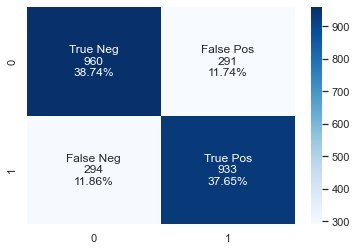

In [115]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm_lr = confusion_matrix(Y_test, y_pred_lr)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_lr.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_lr.flatten()/np.sum(cm_lr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_lr, annot=labels, fmt="", cmap='Blues')

### Random Forest Classifier

In [116]:
#Fitting RandomForestClassifier to the model
from sklearn.ensemble import  RandomForestClassifier

classifier_rfs = RandomForestClassifier(n_estimators=100, random_state=0)
classifier_rfs.fit(X_train, Y_train)
y_pred_rfs = classifier_rfs.predict(X_test)
y_pred_rfs = y_pred_rfs.reshape((2478, 1))
dt = pd.DataFrame(np.concatenate((Y_test, y_pred_rfs), axis = 1),columns = ["RainTomorrow", "Prediction"])
dt['RainTomorrow'].replace({0: 'No', 1: 'Yes'}, inplace  = True)
dt['Prediction'].replace({0: 'No', 1: 'Yes'}, inplace  = True)
print(dt)

accuracy_rfs = accuracy_score(Y_test, y_pred_rfs)

print('\n')
print('\n')
print(' The Accuracy of Random Forest Classifier is :- ',accuracy_rfs)

     RainTomorrow Prediction
0             Yes        Yes
1              No         No
2              No         No
3              No         No
4             Yes        Yes
...           ...        ...
2473          Yes        Yes
2474           No         No
2475           No         No
2476          Yes        Yes
2477           No         No

[2478 rows x 2 columns]




 The Accuracy of Random Forest Classifier is :-  0.9612590799031477


<AxesSubplot:>

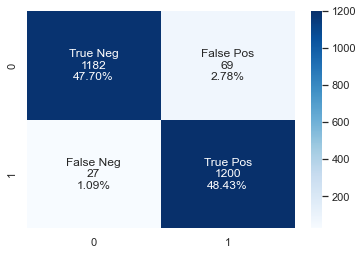

In [117]:
#Creating the Confusion matrix  

from sklearn.metrics import confusion_matrix  
cm_rfs = confusion_matrix(Y_test, y_pred_rfs)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_rfs.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_rfs.flatten()/np.sum(cm_rfs)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_rfs, annot=labels, fmt="", cmap='Blues')

### Decision Trees

In [118]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  

classifier_dt = DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier_dt.fit(X_train, Y_train)
y_pred_dt = classifier_dt.predict(X_test)
y_pred_dt = y_pred_dt.reshape((2478, 1))
dt = pd.DataFrame(np.concatenate((Y_test, y_pred_dt), axis = 1),columns = ["RainTomorrow", "Prediction"])
dt['RainTomorrow'].replace({0: 'No', 1: 'Yes'}, inplace  = True)
dt['Prediction'].replace({0: 'No', 1: 'Yes'}, inplace  = True)

print(dt)

print('\n')
print('\n')

accuracy_dt = accuracy_score(Y_test, y_pred_dt)
print('  The Accuracy of Decision Trees is :- ',accuracy_dt)

     RainTomorrow Prediction
0             Yes        Yes
1              No         No
2              No         No
3              No         No
4             Yes        Yes
...           ...        ...
2473          Yes        Yes
2474           No        Yes
2475           No         No
2476          Yes        Yes
2477           No         No

[2478 rows x 2 columns]




  The Accuracy of Decision Trees is :-  0.927360774818402


<AxesSubplot:>

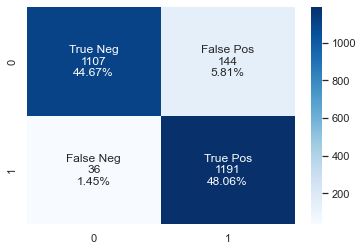

In [119]:
from sklearn.metrics import confusion_matrix  
cm_dt = confusion_matrix(Y_test, y_pred_dt)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_dt.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_dt.flatten()/np.sum(cm_dt)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_dt, annot=labels, fmt="", cmap='Blues')

### Light GBM

In [120]:
from lightgbm import LGBMClassifier

classifier_lgbm = LGBMClassifier(random_state = 0)
classifier_lgbm.fit(X_train, Y_train)
y_pred_lgbm = classifier_lgbm.predict(X_test)
y_pred_lgbm = y_pred_lgbm.reshape((2478, 1))
dt = pd.DataFrame(np.concatenate((Y_test, y_pred_lgbm), axis = 1),columns = ["RainTomorrow", "Prediction"])
dt['RainTomorrow'].replace({0: 'No', 1: 'Yes'}, inplace  = True)
dt['Prediction'].replace({0: 'No', 1: 'Yes'}, inplace  = True)

print(dt)

print('\n')
print('\n')

accuracy_lgbm = accuracy_score(Y_test, y_pred_lgbm)
print('  The Accuracy of Light Gradient Boosting Machine is :- ',accuracy_lgbm)

     RainTomorrow Prediction
0             Yes        Yes
1              No         No
2              No         No
3              No        Yes
4             Yes         No
...           ...        ...
2473          Yes        Yes
2474           No         No
2475           No         No
2476          Yes        Yes
2477           No         No

[2478 rows x 2 columns]




  The Accuracy of Light Gradient Boosting Machine is :-  0.9031476997578692


<AxesSubplot:>

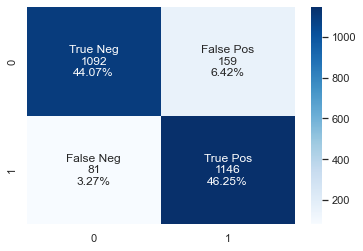

In [121]:
from sklearn.metrics import confusion_matrix  
cm_lgbm = confusion_matrix(Y_test, y_pred_lgbm)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_lgbm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_lgbm.flatten()/np.sum(cm_lgbm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_lgbm, annot=labels, fmt="", cmap='Blues')

### Naive Bayes

In [122]:
from sklearn.naive_bayes import GaussianNB

classifier_nb = GaussianNB()
classifier_nb.fit(X_train, Y_train)
y_pred_nb = classifier_nb.predict(X_test)
y_pred_nb = y_pred_nb.reshape((2478, 1))
dt = pd.DataFrame(np.concatenate((Y_test, y_pred_nb), axis = 1),columns = ["RainTomorrow", "Prediction"])
dt['RainTomorrow'].replace({0: 'No', 1: 'Yes'}, inplace  = True)
dt['Prediction'].replace({0: 'No', 1: 'Yes'}, inplace  = True)

print(dt)

print('\n')
print('\n')

accuracy_nb = accuracy_score(Y_test, y_pred_nb)
print('   The Accuracy of Light Gradient Boosting Machine is :- ',accuracy_nb)

     RainTomorrow Prediction
0             Yes        Yes
1              No         No
2              No         No
3              No        Yes
4             Yes         No
...           ...        ...
2473          Yes        Yes
2474           No         No
2475           No         No
2476          Yes         No
2477           No         No

[2478 rows x 2 columns]




   The Accuracy of Light Gradient Boosting Machine is :-  0.7401129943502824


<AxesSubplot:>

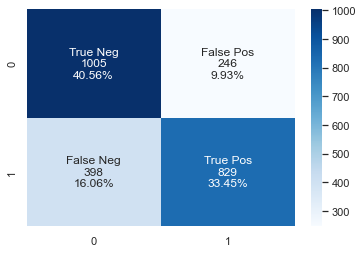

In [123]:
from sklearn.metrics import confusion_matrix  
cm_nb = confusion_matrix(Y_test, y_pred_nb)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_nb.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_nb.flatten()/np.sum(cm_nb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_nb, annot=labels, fmt="", cmap='Blues')

## Accuracy Comparison

In [124]:
accuracy_dict = {"Logistic Regression": accuracy_lr,
                 "Random Forest": accuracy_rfs,
                 "Decision Trees": accuracy_dt,
                 "LightGBM": accuracy_lgbm,
                 "Naive Bayes": accuracy_nb}

accuracy_df = pd.DataFrame( pd.Series(accuracy_dict, index = accuracy_dict.keys()), columns = ["Accuracy"])
accuracy_df

,Accuracy
Logistic Regression,0.763923
Random Forest,0.961259
Decision Trees,0.927361
LightGBM,0.903148
Naive Bayes,0.740113


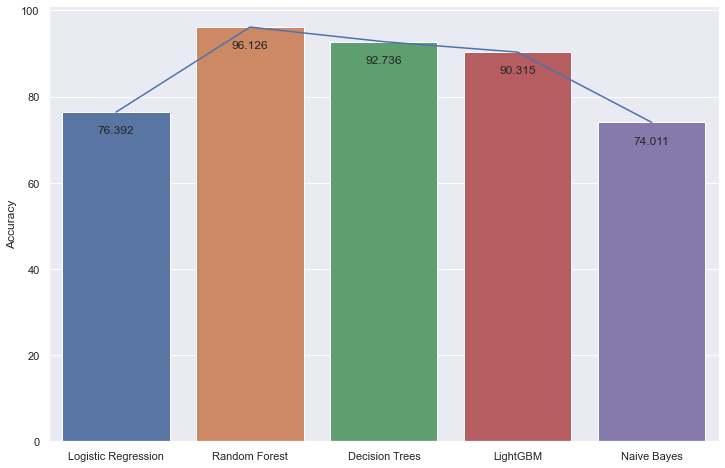

In [125]:
fig = plt.gcf();
fig.set_size_inches(12, 8);

sns.lineplot(x = accuracy_df.index, y = accuracy_df.Accuracy*100);
sns.barplot(x = accuracy_df.index, y = accuracy_df.Accuracy*100);

for i, val in enumerate(accuracy_df.index):
    y = round(accuracy_df.loc[val].sum()*100, 3)
    plt.text(i, y-5, str(y), ha = "center")

### Conclusion

Depending on the accuracy and graphs on each model we can assume that Random Forest model is the best model that fit this data .